In [1]:
push!(LOAD_PATH,"C:/JMB/DINEOF.jl/src","."); using DINEOF
using PyPlot
using LinearAlgebra
using Arpack
using Random
using Statistics

┌ Info: Recompiling stale cache file C:\Users\jmbeckers\.julia\compiled\v1.2\DINEOF.ji for DINEOF [top-level]
└ @ Base loading.jl:1240


In [2]:
?DINEOF_cvmask

search: DINEOF_cvmask



```
cvmask=DINEOF_cvmask(X,coverage=0.01;cvmethod="Random",maxbubblesize=0.01*[size(X)...],dimensionsforcopy=[],maximumiterations=1000)
```

# Using the data array X, create a cross validation mask of same size.

# Input:

  * `X`: an N-dimensional array of data where missing values are NaN
  * `coverage` : fraction of points to be used for cross validation (NaN points in X are not taken into account in this coverage estimate and cvmask will never be true on a NaN point of X)
  * `cvmethod`: optional keyword argument. Current options are "Random", "Bubbles" or "CopyMask". "Random" just adds single points; "Bubbles" adds ellipsoides with maximum axes length defined in maxbubblesize. "CopyMask" takes a slive of X and uses the NaNs in this slice to create a slice of cvmask in another location. The dimension along which the slice is moves/copied is defined in array dimensionsforcopy.
  * `maxbubblesize`: array which for each dimension contains the maximum size of the bubble ellipsoide
  * `dimensionsforcopy`: array of boolens which for each dimensions tells whether or not a mask from NaN in X can be copied.
  * `maximumiterations` : saveguard for option "CopyMask" which is not ensured to reach the requested `coverage`.

# Output:

  * `cvmask`: boolean array of the same size as input array X with "true" on points to be used for cross-valitation


In [3]:
Random.seed!(123)

MersenneTwister(UInt32[0x0000007b], Random.DSFMT.DSFMT_state(Int32[1464307935, 1073116007, 222134151, 1073120226, -290652630, 1072956456, -580276323, 1073476387, 1332671753, 1073438661  …  138346874, 1073030449, 1049893279, 1073166535, -1999907543, 1597138926, -775229811, 32947490, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x0000000000000

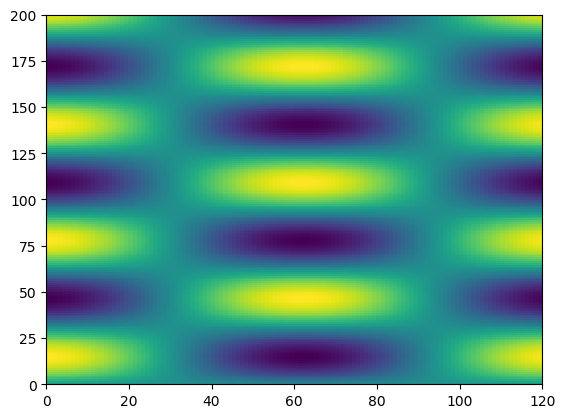

PyObject <matplotlib.collections.PolyCollection object at 0x000000002BD6C6A0>

In [4]:
NX=200
NY=120
X=zeros(Float64,NX,NY)
      for j=1:NY
            for i=1:NX
                X[i,j]=sin(i/10)*cos(j/20)
            end
        end
pcolor(X)


Defaults only

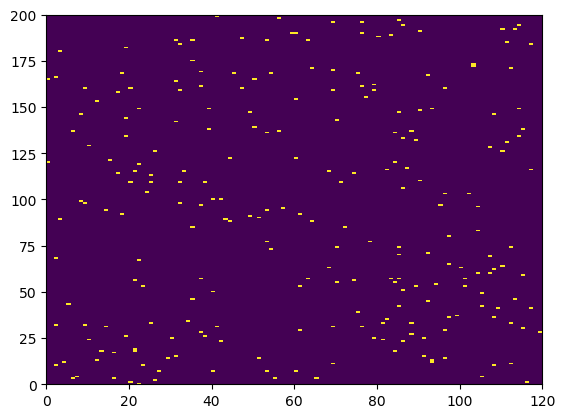

batchsize = 24


PyObject <matplotlib.collections.PolyCollection object at 0x0000000035878B00>

In [5]:
cvmask=DINEOF_cvmask(X)
pcolor(cvmask)

Specify coverage (fraction between 0 and 1)


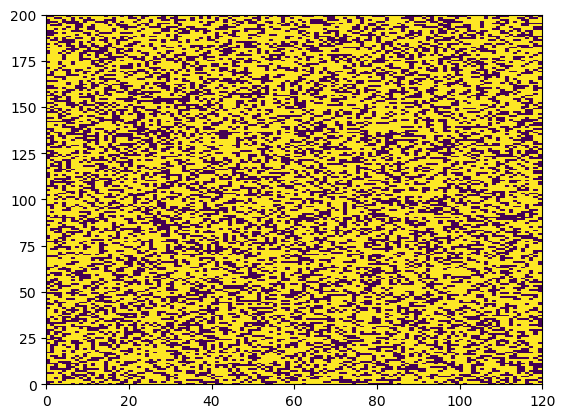

batchsize = 1440


PyObject <matplotlib.collections.PolyCollection object at 0x00000000376E1668>

In [6]:
cvmask=DINEOF_cvmask(X,0.6)
pcolor(cvmask)

Fraction is the number of pixels from the points that are not NaN




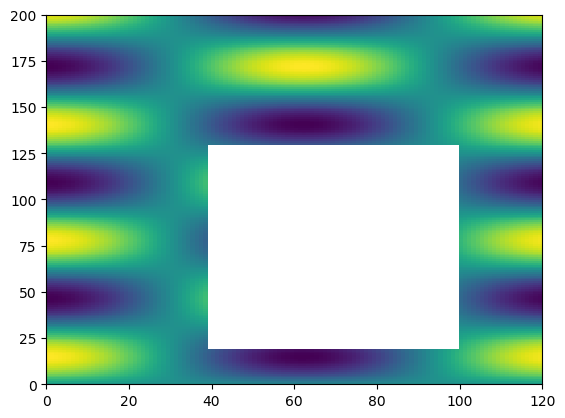

PyObject <matplotlib.collections.PolyCollection object at 0x00000000394F89B0>

In [7]:
X[20:130,40:100].=NaN
pcolor(X)

Cross validation points never on missing data points

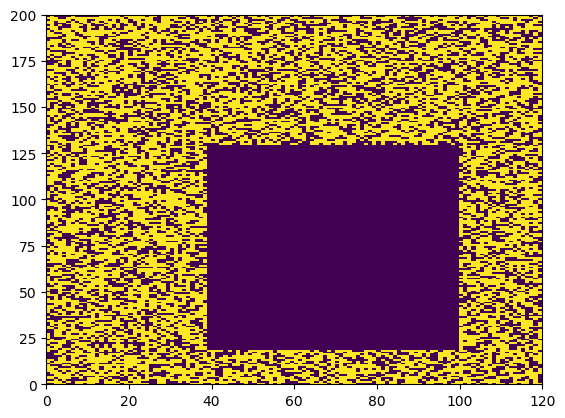

batchsize = 1034


PyObject <matplotlib.collections.PolyCollection object at 0x0000000039E13E10>

In [8]:
cvmask=DINEOF_cvmask(X,0.6)
pcolor(cvmask)

Now with bubbles

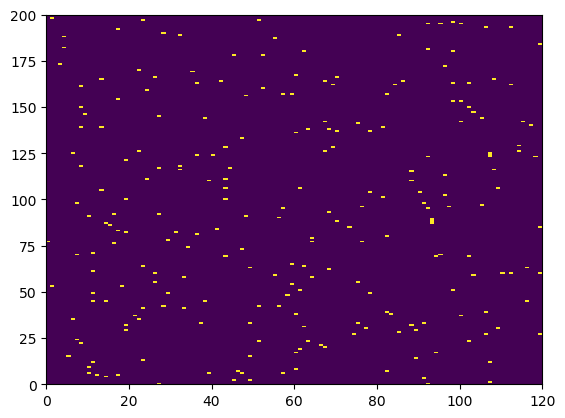

PyObject <matplotlib.collections.PolyCollection object at 0x000000003BD764A8>

In [9]:
 for j=1:NY
            for i=1:NX
                X[i,j]=sin(i/10)*cos(j/20)
            end
 end
cvmask=DINEOF_cvmask(X;cvmethod="Bubbles")
pcolor(cvmask)

Specify maximum bubble size

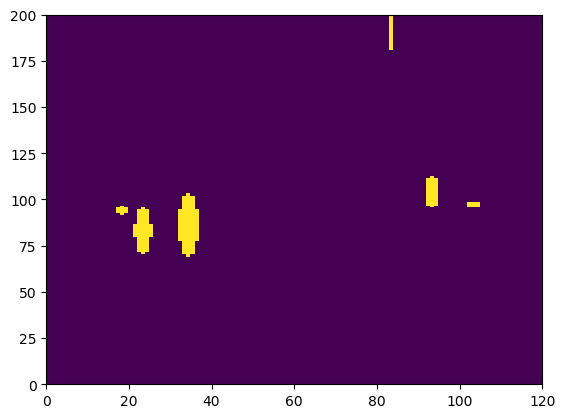

PyObject <matplotlib.collections.PolyCollection object at 0x000000003CBBC7B8>

In [10]:
cvmask=DINEOF_cvmask(X;cvmethod="Bubbles",maxbubblesize=[50,5])
pcolor(cvmask)

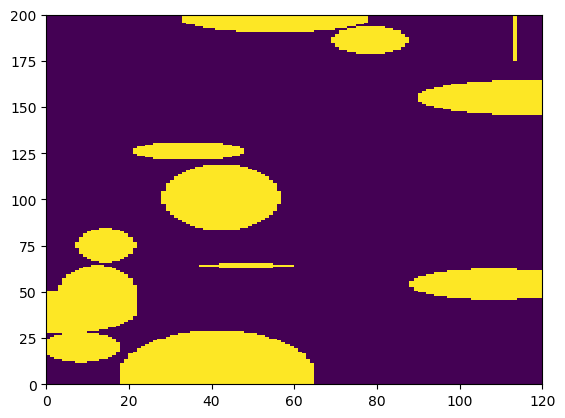

PyObject <matplotlib.collections.PolyCollection object at 0x000000003DA05E10>

In [11]:
cvmask=DINEOF_cvmask(X,0.2;cvmethod="Bubbles",maxbubblesize=[50,50])
pcolor(cvmask)

Now copy NaN pattern from X randomly along third dimension

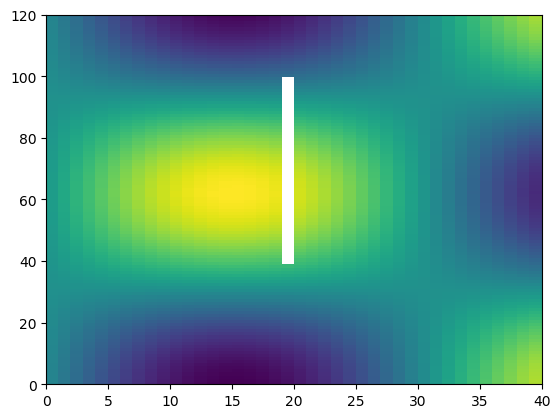

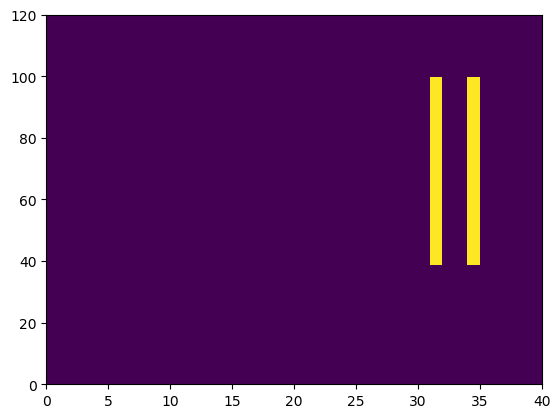

PyObject <matplotlib.collections.PolyCollection object at 0x000000004016DB38>

In [12]:
NZ=40
X=zeros(NX,NY,NZ)
for k=1:NZ
    for j=1:NY
         for i=1:NX
            X[i,j,k]=sin(i/10)*cos(j/20)*sin(k/10)
         end
    end
end
X[20:130,40:100,20].=NaN
pcolor(X[50,:,:])
cvmask=DINEOF_cvmask(X;cvmethod="CopyMask",dimensionsforcopy=[0,0,1])
figure()
pcolor(cvmask[50,:,:])

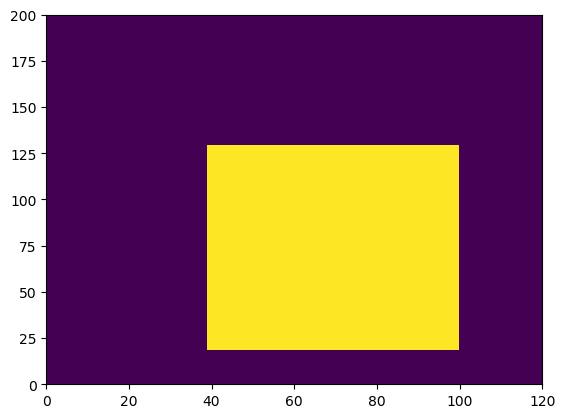

PyObject <matplotlib.collections.PolyCollection object at 0x0000000041452B00>

In [13]:
pcolor(cvmask[:,:,32])